In [1]:
from pathlib import Path
from typing import Any, Dict, Tuple, Union

import os
import numpy as np
import PIL
import SimpleITK

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

type(img)=<class 'numpy.ndarray'>
img.dtype=dtype('float32')
img.shape=(10, 192, 192)
voxelspacing=(1.3671900033950806, 1.3671900033950806, 1.0)
Nb slice= 10



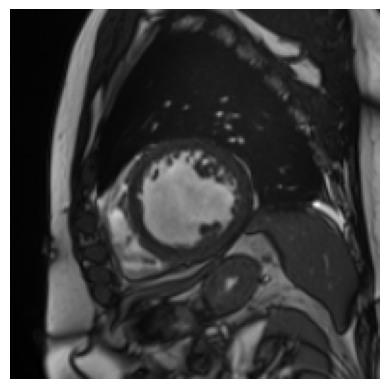

In [2]:
def sitk_load(filepath: Union[str, Path]) -> Tuple[np.ndarray, Dict[str, Any]]:
    """Loads an image using SimpleITK and returns the image and its metadata.

    Args:
        filepath: Path to the image.

    Returns:
        - ([N], H, W), Image array.
        - Collection of metadata.
    """
    # Load image and save info
    image = SimpleITK.ReadImage(str(filepath))
    info = {"origin": image.GetOrigin(), "spacing": image.GetSpacing(), "direction": image.GetDirection()}

    # Extract numpy array from the SimpleITK image object
    im_array = np.squeeze(SimpleITK.GetArrayFromImage(image))

    return im_array, info

# Select the patient identification (scalar value between 1 and 45)
patient_id = 1
instant = 'frame01'

patient_name = f"patient{patient_id:03d}"
path_to_bmode_image = f"acdc_bias_corr_cropped/{patient_name}/img_cropped.nii.gz"

img, info = sitk_load(path_to_bmode_image)
voxelspacing = info['spacing']
num_slice, width, height = img.shape

# Display the corresponding useful information
print(f"{type(img)=}")
print(f"{img.dtype=}")
print(f"{img.shape=}")
print(f"{voxelspacing=}")
print(f"Nb slice= {num_slice}")
print('')

# Display one slice
fig, ax = plt.subplots()
ax.set_axis_off()
slice = num_slice//2
im = ax.imshow(img[slice], cmap='gray')


seq = img

In [3]:
# Initialisation function for the animation
def init():
    im.set_data(seq[0])
    return [im]

# Animation function to update the current frame for display
def animate(i):
    im.set_array(seq[i])
    return [im]

In [ ]:
# Create animation
anim = FuncAnimation(fig, animate, init_func=init, frames=num_slice, interval=40, blit=True)

# Display the animation in the jupyter notebook
HTML(anim.to_jshtml())
